In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry as pyc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Read data from the dataset

In [2]:
df=pd.read_csv('Customers_File.csv', delimiter=',')
df.head(10)

,Customer_ID,First_Name,Last_Name,DOB,Customer_Type,PAN,Date_of_joining,Date_of_exit,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud
0,8606,RADDULAN,SAHIRON,21-05-1989,1,616802609,27-10-2008,03-06-2015,True,M,Married,False,False,Philippines,Philippines,Fraud
1,6462,AHMED,ABDULLAH,04-02-1963,1,868739475,18-04-2009,09-12-2019,True,M,Married,False,True,Egypt,Egypt,Fraud
2,9574,HASAN,IZZALDIN,24-04-1963,2,544436596,18-07-2003,23-07-2020,True,M,Married,False,False,Turkey,Kenya,Fraud
3,5350,AHLAM,AlTAMIMI,14-04-1980,3,212184907,17-11-2013,28-08-2011,False,F,Not Married,True,True,Turkey,Jordan,Fraud
4,8903,RAMADAN,SHALLAH,01-01-1958,2,849660885,10-04-2020,04-02-2014,False,M,Married,True,True,Gaza Strip,Gaza Strip,Fraud
5,9405,ABDELKARIM,MOHAMED,21-08-1986,2,843535347,26-08-2001,10-06-2020,True,M,Not Married,False,False,Syria,SauDiArabia,Fraud
6,6231,JOANNE,CHESIMARD,02-10-1952,2,422261413,30-01-2020,15-06-2013,False,M,Married,False,False,Indonesia,China,Fraud
7,5738,ALI,ATWA,17-10-1988,1,642127930,12-05-2015,12-05-2007,False,M,Married,False,True,China,Indonesia,Fraud
8,8954,SAIF,ADEL,02-02-1963,1,490435667,16-07-2015,13-01-2009,True,M,Married,True,False,Egypt,Honduras,Fraud
9,7037,AYMAN,ZAWAHIRI,03-09-1951,1,404226711,17-01-2008,31-08-2007,True,M,Not Married,False,True,Iraq,Pakistan,Fraud


# Data Preprocessing

1. Converting the non numeric columns into numeric columns for the Machine Learning model's understanding.
2. Dropping the unique columns acting as keys to the data.
3. Splitting date columns to convert them into numeric columns

## Converting Dependent variable into number

In [3]:
df['Fraud'] = df['Fraud'].map({'Fraud':1, 'Not Fraud':0})
df.Fraud.head()

0    1
1    1
2    1
3    1
4    1
Name: Fraud, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer_ID           11000 non-null  int64 
 1   First_Name            11000 non-null  object
 2   Last_Name             11000 non-null  object
 3   DOB                   11000 non-null  object
 4   Customer_Type         11000 non-null  int64 
 5   PAN                   11000 non-null  int64 
 6   Date_of_joining       11000 non-null  object
 7   Date_of_exit          11000 non-null  object
 8   Deceased_Flag         11000 non-null  bool  
 9   Gender                11000 non-null  object
 10  Martial_Status        11000 non-null  object
 11  PEP_Flag              11000 non-null  bool  
 12  CTF_Flag              11000 non-null  bool  
 13  Country_of_residence  11000 non-null  object
 14  Country_of_Origin     11000 non-null  object
 15  Fraud                 11000 non-null

In [5]:
df = df.drop(['Customer_ID'], axis=1)
df = df.drop(['PAN'], axis=1)

## Converting Categorical Variables to Numbers

In [6]:
df.Deceased_Flag= df.Deceased_Flag.map({True:1, False:0})
df.Gender =df.Gender.map({'M':1, 'F':0})
df.Martial_Status = df.Martial_Status.map({'Married':1,'Not Married':0})
df.PEP_Flag = df.PEP_Flag.map({True:1, False:0})
df.CTF_Flag = df.CTF_Flag.map({True:1, False:0})

## Splitting the date fields

In [7]:
# DOB
df[['DD','MM','YY']]=df.DOB.str.split('-', expand=True)
df[['DD','MM','YY']] = df[['DD','MM','YY']].astype(int)
df.drop(['DOB'], axis=1, inplace= True)

# Date_of_joining
df[['DDj','MMj','YYj']] = df.Date_of_joining.str.split('-', expand=True)
df[['DDj','MMj','YYj']] = df[['DDj','MMj','YYj']].astype(int)

#Date_of_exit
df[['DDe','MMe','YYe']] = df.Date_of_exit.str.split('-', expand=True)
df[['DDe','MMe','YYe']] = df[['DDe','MMe','YYe']].astype(int)

df.drop(['Date_of_joining', 'Date_of_exit'], axis=1, inplace= True)

## Tokenizing texts
First Name and Last Name are key columns for our data analysis, converting them to numbers using tokenizer. The main purpose is to keep the model interpretable and using the tokenized values the result data set can be decrypted.

In [8]:
#Removal of extra spaces from the data
df['First_Name']=df['First_Name'].str.lower()
df['Last_Name']=df['Last_Name'].str.lower()
#Converting columns into Lists for the tokernizer
first_name=list(df.First_Name.values)
last_name=list(df.Last_Name.values)

#Tokenizing First Name
tk_fn = Tokenizer(num_words=2, lower=False, oov_token=None)
tk_fn.fit_on_texts(first_name)
wi_fn=tk_fn.word_index
wi_fn

#Tokenizing Last Name
tk_ln = Tokenizer(num_words=2, lower=False, oov_token=None)
tk_ln.fit_on_texts(last_name)
wi_ln=tk_ln.word_index
wi_ln

#Reflecting changes to the Dataframe
df=df.replace({"First_Name" : wi_fn})
df=df.replace({"Last_Name" : wi_ln})
df.head()

,First_Name,Last_Name,Customer_Type,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud,DD,MM,YY,DDj,MMj,YYj,DDe,MMe,YYe
0,1230,1138,1,1,1,1,0,0,Philippines,Philippines,1,21,5,1989,27,10,2008,3,6,2015
1,9,1139,1,1,1,1,0,1,Egypt,Egypt,1,4,2,1963,18,4,2009,9,12,2019
2,1231,1140,2,1,1,1,0,0,Turkey,Kenya,1,24,4,1963,18,7,2003,23,7,2020
3,1232,1141,3,0,0,0,1,1,Turkey,Jordan,1,14,4,1980,17,11,2013,28,8,2011
4,1233,1142,2,0,1,1,1,1,Gaza Strip,Gaza Strip,1,1,1,1958,10,4,2020,4,2,2014


In [9]:
#Converting the COR and COO to alpha2 standard
import pycountry as pyc

input_COR = list(df['Country_of_residence'])
input_COO = list(df['Country_of_Origin'])
countries = {}
for country in pyc.countries:
    countries[country.name] = country.alpha_2

COR = [countries.get(country, 'RU') for country in input_COR]
COO = [countries.get(country, 'RU') for country in input_COO]

df['COR']=COR
df['COO']=COO
df.drop(['Country_of_residence','Country_of_Origin'], axis=1, inplace=True)


#Tokenize COR
tk_cor = Tokenizer(num_words=2, lower=False, oov_token=None)
tk_cor.fit_on_texts(COR)
wi_cor=tk_cor.word_index
wi_cor

#Tokenizing COO
tk_coo = Tokenizer(num_words=2, lower=False, oov_token=None)
tk_coo.fit_on_texts(COO)
wi_coo=tk_coo.word_index
wi_coo

#Reflecting changes to the Dataframe
df=df.replace({"COR" : wi_cor})
df=df.replace({"COO" : wi_coo})
df.head()

,First_Name,Last_Name,Customer_Type,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Fraud,DD,MM,YY,DDj,MMj,YYj,DDe,MMe,YYe,COR,COO
0,1230,1138,1,1,1,1,0,0,1,21,5,1989,27,10,2008,3,6,2015,4,4
1,9,1139,1,1,1,1,0,1,1,4,2,1963,18,4,2009,9,12,2019,42,47
2,1231,1140,2,1,1,1,0,0,1,24,4,1963,18,7,2003,23,7,2020,118,51
3,1232,1141,3,0,0,0,1,1,1,14,4,1980,17,11,2013,28,8,2011,118,68
4,1233,1142,2,0,1,1,1,1,1,1,1,1958,10,4,2020,4,2,2014,2,2


## Coorelation Matrix

To understand the relation of the data let's create a coorelation matrix

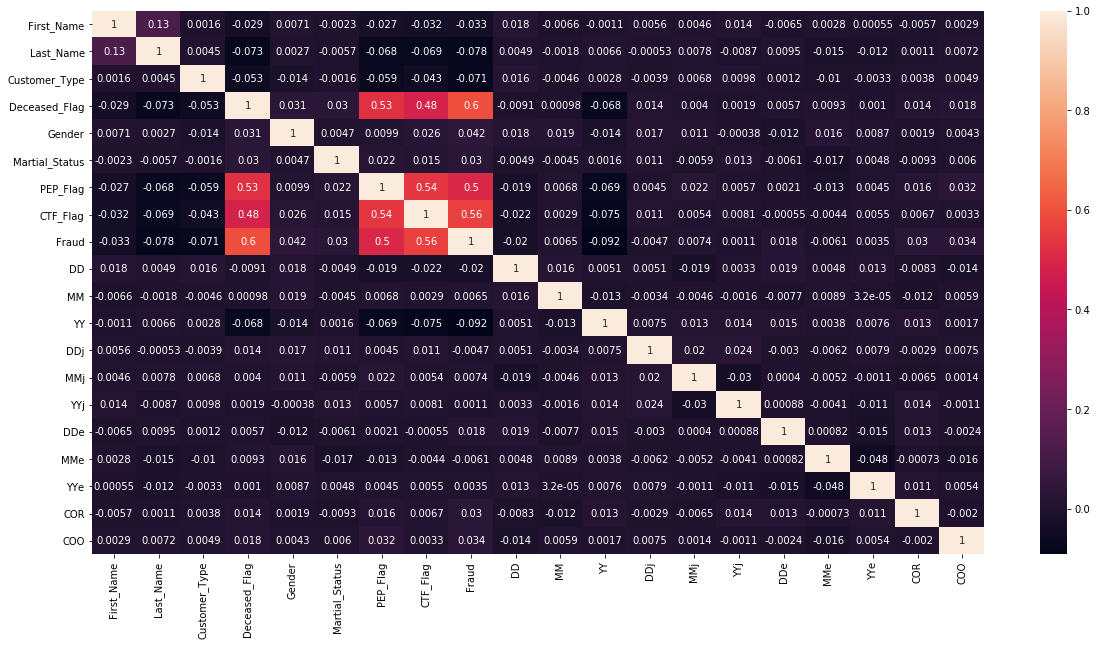

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Some high coorelations can be observed between the Fraud column with the (Deceased flag, PEP flag and CTF Flag). This is expected as the PEP flag and the CTF flag mean that the customer is more risky and prone to be fraud.

Similarly PEP and CTF are also coorelated as there are a lot of customer with both the flags having same value.

Unable to explain the relation of Deceased Flag.

## Train test split

In [11]:
X=df.drop(['Fraud'], axis=1)
y=df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_Name      11000 non-null  int64
 1   Last_Name       11000 non-null  int64
 2   Customer_Type   11000 non-null  int64
 3   Deceased_Flag   11000 non-null  int64
 4   Gender          11000 non-null  int64
 5   Martial_Status  11000 non-null  int64
 6   PEP_Flag        11000 non-null  int64
 7   CTF_Flag        11000 non-null  int64
 8   DD              11000 non-null  int32
 9   MM              11000 non-null  int32
 10  YY              11000 non-null  int32
 11  DDj             11000 non-null  int32
 12  MMj             11000 non-null  int32
 13  YYj             11000 non-null  int32
 14  DDe             11000 non-null  int32
 15  MMe             11000 non-null  int32
 16  YYe             11000 non-null  int32
 17  COR             11000 non-null  int64
 18  COO             11000 non-

# Model Creation
Let's start with a Logistic Regression model to check the initial nature of the data and get some idea of the metrics

In [13]:
from sklearn.linear_model import LogisticRegression

logr=LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000)

In [14]:
model = logr.fit(X_train, y_train)

The features need to be scaled for Logistic Regression model

In [15]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_logm =X_train.copy()
X_train_logm[['DD','MM','YY','DDj','MMj','YYj','DDe','MMe','YYe']] = scaler.fit_transform(X_train[['DD','MM','YY','DDj','MMj','YYj','DDe','MMe','YYe']])
X_train_logm.head()

,First_Name,Last_Name,Customer_Type,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,DD,MM,YY,DDj,MMj,YYj,DDe,MMe,YYe,COR,COO
10530,919,1015,3,0,0,1,0,0,-1.092785,-0.443436,0.606779,1.174916,1.309157,1.373897,0.606612,-1.301459,1.683045,5,1
7744,1393,7228,2,0,1,0,0,0,-1.432238,0.136291,0.271778,-0.870101,1.599424,-0.471673,0.380102,-1.301459,-0.295139,15,12
2459,1925,3075,5,0,0,0,0,0,0.604482,1.005882,0.690529,0.038795,-0.142174,0.367222,1.286144,-1.592170,-1.394130,2,13
3724,2280,4074,3,0,1,0,0,0,-0.413878,-0.153572,-0.565725,1.061304,0.438359,1.541676,1.739165,0.442806,0.144458,21,8
1238,254,2090,5,0,0,0,0,0,0.830784,-0.443436,1.025530,-0.642877,-0.722706,1.373897,-1.318728,-0.429326,-0.954534,26,12


X_train_logm has the scaled features, it should allow the model to be trained.

In [16]:
model = logr.fit(X_train_logm, y_train)

#### Train set prediction :: LR Model

In [17]:
pred_probs_train = model.predict_proba(X_train_logm)
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':pred_probs_train[:, 1].tolist()})

In [18]:
y_train_pred_final

,Fraud,Fraud_Prob
0,0,0.003335
1,0,0.000156
2,0,0.000034
3,0,0.000679
4,0,0.000047
...,...,...
7694,0,0.000758
7695,0,0.000114
7696,0,0.003571
7697,0,0.000005


In [19]:
#Setting the threshold to 0.5 for now
threshold = 0.5

In [20]:
y_train_pred_final['Predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > threshold else 0)

In [21]:
# Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.5
Accuracy   : 0.997532147032082


In [22]:
print(confusion)

[[7666    5]
 [  14   14]]


#### Test set prediction :: LR Model

In [23]:
#Scaling test data
X_test_logm =X_test.copy()
X_test_logm[['DD','MM','YY','DDj','MMj','YYj','DDe','MMe','YYe']] = scaler.transform(X_test[['DD','MM','YY','DDj','MMj','YYj','DDe','MMe','YYe']])
X_test_logm.head()

,First_Name,Last_Name,Customer_Type,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,DD,MM,YY,DDj,MMj,YYj,DDe,MMe,YYe,COR,COO
351,3209,1412,4,0,0,1,0,0,0.717633,0.136291,-1.486978,-0.756489,1.018891,1.541676,0.493357,0.442806,-0.734735,1,6
3305,1617,3755,3,0,0,1,0,0,0.491331,1.295746,1.611782,0.720468,0.148093,1.541676,-1.545238,-0.720037,1.243449,1,1
4700,911,4825,5,0,0,0,0,0,1.509691,-1.602891,-1.654479,0.038795,-0.722706,-0.471673,-0.072919,-0.720037,0.584054,3,66
6405,4823,6186,5,0,0,0,0,0,1.396540,0.716019,0.104277,0.266020,-0.142174,0.031664,-0.525941,0.733517,1.463247,2,1
7027,2794,6670,3,0,0,0,0,0,0.604482,1.585610,-0.565725,0.266020,1.599424,-0.471673,-1.658494,0.152096,1.023651,5,16


In [24]:
pred_probs_test = model.predict_proba(X_test_logm)
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_Prob':pred_probs_test[:, 1].tolist()})
y_test_pred_final['Predicted'] = y_test_pred_final.Fraud_Prob.map(lambda x: 1 if x > threshold else 0)

In [25]:
y_test_pred_final

,Fraud,Fraud_Prob,Predicted
0,0,1.011135e-03,0
1,0,1.331642e-04,0
2,0,1.670070e-05,0
3,0,8.977896e-07,0
4,0,1.586508e-05,0
...,...,...,...
3295,0,1.064476e-05,0
3296,0,1.639694e-05,0
3297,0,6.196169e-04,0
3298,0,5.267498e-04,0


In [26]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Fraud, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.3888888888888889
Accuracy   : 0.9960606060606061


In [27]:
print(confusion)

[[3280    2]
 [  11    7]]


The sensitivity is very low with the Logistic Regression model. Let us try a different algorithm, perhaps a non linear algorithm would perform better.

## Decision Tree

In [28]:
tree= DecisionTreeClassifier(random_state=42, max_depth = 4)

In [29]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Train data prediction

In [30]:
y_train_pred = tree.predict(X_train)
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Predicted':y_train_pred})

In [31]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.9285714285714286
Accuracy   : 0.9994804520067542


In [32]:
print(confusion)

[[7669    2]
 [   2   26]]


### Test data prediction

In [33]:
y_test_pred = tree.predict(X_test)
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Predicted':y_test_pred})

In [34]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Fraud, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7777777777777778
Accuracy   : 0.9984848484848485


In [35]:
print(confusion)

[[3281    1]
 [   4   14]]


## Hyperparameter tuning

In [36]:
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20, 50],
    'min_samples_leaf': [10, 20, 50, 100]
}

In [37]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [38]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Wall time: 926 ms


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    0.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_

In [39]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [40]:
dt_best = grid_search.best_estimator_

#### Train set prediction :: DT

In [41]:
y_train_pred = dt_best.predict(X_train)
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Predicted':y_train_pred})
y_train_pred_final

,Fraud,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7694,0,1
7695,0,0
7696,0,0
7697,0,0


In [42]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 1.0
Accuracy   : 0.9270035069489544


In [43]:
print(confusion)

[[7109  562]
 [   0   28]]


#### Test set prediction :: DT

In [44]:
y_test_pred = dt_best.predict(X_test)


In [45]:
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Predicted':y_test_pred})

In [46]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Fraud, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7222222222222222
Accuracy   : 0.9221212121212121


In [47]:
print(confusion)

[[3030  252]
 [   5   13]]


As we can see there is a drastic improvement in the sensitivity of the model, 72 percent is a decent score

In [48]:
y_test_pred_percent = dt_best.predict_proba(X_test)
y_test_pred_percent

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Random Forest Model

In [49]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10],
    'min_samples_leaf': [50, 100, 200],
    'max_features': [8, 10],
    'n_estimators': [50, 100, 200]
}

In [50]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [51]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   18.2s finished


Wall time: 18.5 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                              

In [52]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Train set prediction :: RF

In [53]:
y_train_pred = rf_best.predict(X_train)
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Predicted':y_train_pred})

In [54]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 1.0
Accuracy   : 0.9959735030523444


In [55]:
print(confusion)

[[7640   31]
 [   0   28]]


#### Test set prediction :: RF

In [56]:
y_test_pred = rf_best.predict(X_test)
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Predicted':y_test_pred})

In [57]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Fraud, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.5555555555555556
Accuracy   : 0.9936363636363637


In [58]:
print(confusion)

[[3269   13]
 [   8   10]]


The sensitivity has dropped to 56 percent, in case of the Decision Tree model it was 72 percent. The ley difference is we have handled the unbalanced dataset which has led to the increase in incorrect judgement of a few alerts as True Negative.

Our key goal is to maximize the sepcificity as we do not want any suspicious alert to be marked as not suspicious.

The solution to this is a valid dataset, the dataset which has been used in this model has been created using a randomizer tool and some manual addition.

In [59]:
#Testing predict_proba
y_test_pred_proba = rf_best.predict_proba(X_test)
y_test_pred_proba
#y_test_pred_proba_final = pd.DataFrame({'Fraud':y_test.values, 'Predicted':y_test_pred_proba})

array([[1.        , 0.        ],
       [0.9771927 , 0.0228073 ],
       [0.94772401, 0.05227599],
       ...,
       [1.        , 0.        ],
       [0.74685203, 0.25314797],
       [1.        , 0.        ]])

In [60]:
y_test_pred_proba_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_Prob':y_test_pred_proba[:, 1].tolist()})

In [61]:
threshold=0.3

In [62]:
y_test_pred_proba_final['Predicted'] = y_test_pred_proba_final.Fraud_Prob.map(lambda x: 1 if x > threshold else 0)

In [63]:
y_test_pred_proba_final

,Fraud,Fraud_Prob,Predicted
0,0,0.000000,0
1,0,0.022807,0
2,0,0.052276,0
3,0,0.000000,0
4,0,0.000000,0
...,...,...,...
3295,0,0.000000,0
3296,0,0.000000,0
3297,0,0.000000,0
3298,0,0.253148,0


In [64]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_proba_final.Fraud, y_test_pred_proba_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.9444444444444444
Accuracy   : 0.9733333333333334


In [68]:
print(confusion)

[[3195   87]
 [   1   17]]


### Feature Importance 

In [65]:
rf_best.feature_importances_

array([0.06711969, 0.54624887, 0.09115846, 0.        , 0.00568566,
       0.01009209, 0.        , 0.        , 0.0121942 , 0.00615541,
       0.15096058, 0.00674629, 0.0084929 , 0.01729855, 0.02522191,
       0.01752025, 0.00458978, 0.01009017, 0.02042518])

In [66]:
X_train_columns = X_train.columns
imp_df = pd.DataFrame({
    "Varname": X_train_columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Last_Name,0.546249
10,YY,0.150961
2,Customer_Type,0.091158
0,First_Name,0.067120
14,DDe,0.025222
18,COO,0.020425
15,MMe,0.017520
13,YYj,0.017299
8,DD,0.012194
5,Martial_Status,0.010092


In [67]:
import joblib
joblib.dump(rf_best,'./model.joblib', compress=True)
joblib.dump(wi_fn,'./first_name.joblib', compress=True)
joblib.dump(wi_ln,'./last_name.joblib', compress=True)
joblib.dump(wi_coo,'./country_of_origin.joblib', compress=True)
joblib.dump(wi_cor,'./country_of_residence.joblib', compress=True)

['./country_of_residence.joblib']